In [1]:
import matplotlib.pyplot as plt
import numpy as np

from HW6Utils import *
from Layer import *

In [2]:
x_train, y_train, x_test, y_test = load_data('data/mnist.npz')
print('Train set size:', len(x_train))
print('Test set size:', len(x_test))

Train set size: 60000
Test set size: 10000


In [3]:
net = [ Layer((784, 256), sigmoid, sigmoid_deriv),
        Layer((256, 128), sigmoid, sigmoid_deriv),
        Layer((128, 64), sigmoid, sigmoid_deriv),
        Layer((64, 10), softmax, softmax_deriv) ]

In [4]:
def train(net, x, y):
    res = x
    for layer in net:
        res = layer.forward(res)
    delta = np.zeros(10)
    delta[y] = -1./res[y]
    loss = -np.log(res[y])
    for layer in net[::-1]:
        delta = layer.backpropagation(delta, learning_rate, moment)
    return loss

In [5]:
def predict(net, x):
    res = x
    for layer in net:
        res = layer.forward(res)
    return np.argmax(res)

In [6]:
def accuracy(net, xs, ys):
    count = 0
    for x, y in zip(xs, ys):
        if predict(net, x) == y:
            count += 1
    return count / len(xs)

In [7]:
learning_rate = 0.1
moment = 0.001

for epoch in range(4):
    loss = 0
    for x, y in zip(x_train, y_train):
        loss += train(net, x, y)
    loss /= len(x_train)
    
    print('EPOCH:', epoch)
    print('loss:', loss)
    print('accuracy:', accuracy(net, x_test, y_test))

EPOCH: 0
loss: 0.980607467948
accuracy: 0.9273
EPOCH: 1
loss: 0.191639327118
accuracy: 0.9561
EPOCH: 2
loss: 0.130445295369
accuracy: 0.9625
EPOCH: 3
loss: 0.0999622348145
accuracy: 0.966
EPOCH: 4
loss: 0.0802536061866
accuracy: 0.9654
EPOCH: 5
loss: 0.0678325030451
accuracy: 0.9629


KeyboardInterrupt: 

In [8]:
# statistics by digits
correct_count = [0] * 10
failed_count = [0] * 10

error_examples = []
for i, (x, y) in enumerate(zip(x_test, y_test)):
    py = predict(net, x)
    if py != y:
        failed_count[y] += 1
        error_examples.append(i)
    else:
        correct_count[y] += 1

for i in range(10):
    print('%d: correct %d, failed %d' % (i, correct_count[i], failed_count[i]))

0: correct 953, failed 27
1: correct 1118, failed 17
2: correct 980, failed 52
3: correct 981, failed 29
4: correct 973, failed 9
5: correct 836, failed 56
6: correct 901, failed 57
7: correct 1007, failed 21
8: correct 949, failed 25
9: correct 960, failed 49


Correct 9, predicted 4


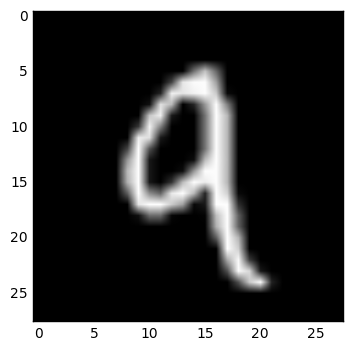

Correct 2, predicted 4


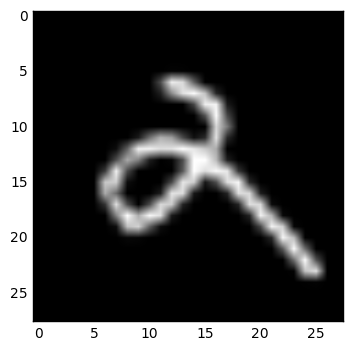

Correct 9, predicted 8


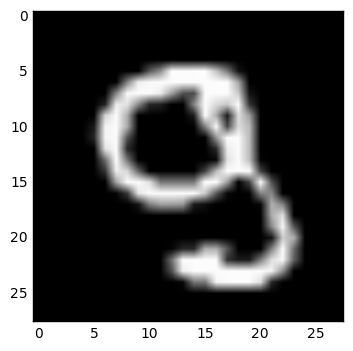

Correct 5, predicted 3


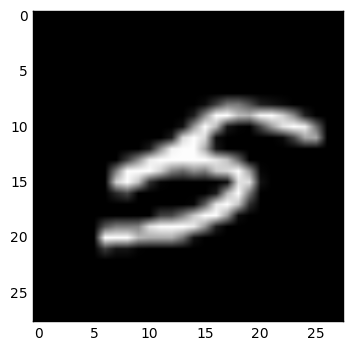

Correct 9, predicted 4


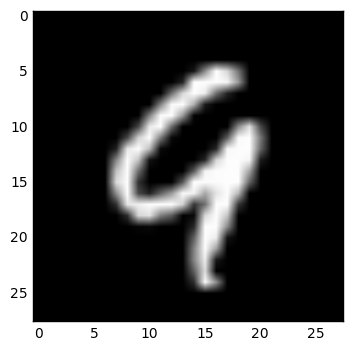

In [9]:
for i in error_examples[:5]:
    x = x_test[i]
    py = predict(net, x)
    x = x.reshape((28,28))
    print('Correct %d, predicted %d' % (y_test[i], py))
    plt.imshow(x, cmap='gray')
    plt.show()